In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num
import matplotlib

import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

from scipy import stats
from scipy.stats import kurtosis, skew

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from statsmodels.tsa.tsatools import lagmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from datetime import timedelta

In [8]:
tableGA=pd.read_csv('Analytics Main - Jan 1st - Dec 7th.csv',delimiter=',')

In [9]:
tableGA=tableGA.dropna()

In [10]:
tableGA['Date']=pd.to_datetime(tableGA['Date'],format='%d/%m/%Y')

In [11]:
tableGA.head()

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%


In [12]:
tableGA['weekend'] = ((tableGA.Date.dt.dayofweek) // 5 == 1).astype(float)

In [13]:
tableGA['weekday'] = tableGA['Date'].apply(lambda x: x.weekday())

In [14]:
pd.set_option('display.max_rows', 10)

In [15]:
# Feature engineering with the date
tableGA['year']=tableGA.Date.dt.year 
tableGA['month']=tableGA.Date.dt.month 
tableGA['day']=tableGA.Date.dt.day

In [16]:
# For the next graphics
tableGA['month_num'] = tableGA['month']

tableGA['month'].replace('1','1 - January',inplace=True)
tableGA['month'].replace('2','2 - Febuary',inplace=True)
tableGA['month'].replace('3','3 - March',inplace=True)
tableGA['month'].replace('4','4- April',inplace=True)
tableGA['month'].replace('5','5 - May',inplace=True)
tableGA['month'].replace('6','6 - June',inplace=True)
tableGA['month'].replace('7','7 - July',inplace=True)
tableGA['month'].replace('8','8 - August',inplace=True)
tableGA['month'].replace('9','8 - September',inplace=True)
tableGA['month'].replace('10','10 - October',inplace=True)
tableGA['month'].replace('11','11 - November',inplace=True)


tableGA['weekday_num'] = tableGA['weekday']
tableGA['weekday'].replace(0,'01 - Monday',inplace=True)
tableGA['weekday'].replace(1,'02 - Tuesday',inplace=True)
tableGA['weekday'].replace(2,'03 - Wednesday',inplace=True)
tableGA['weekday'].replace(3,'04 - Thursday',inplace=True)
tableGA['weekday'].replace(4,'05 - Friday',inplace=True)
tableGA['weekday'].replace(5,'06 - Saturday',inplace=True)
tableGA['weekday'].replace(6,'07 - Sunday',inplace=True)

In [17]:
tableGA=tableGA.dropna()

In [18]:
tableGA

,Date,Product Adds To Cart,Cart-to-Detail Rate,Unique Purchases,Product Checkouts,Buy-to-Detail Rate,weekend,weekday,year,month,day,month_num,weekday_num
0,2021-01-01,"7,671",16.43%,"1,907","32,100",4.08%,0.0,05 - Friday,2021,1,1,1,4
1,2021-01-02,"5,827",16.89%,"1,645","24,764",4.77%,1.0,06 - Saturday,2021,1,2,1,5
2,2021-01-03,"7,905",14.99%,"2,246","28,748",4.26%,1.0,07 - Sunday,2021,1,3,1,6
3,2021-01-04,"4,725",15.92%,"1,400","19,793",4.72%,0.0,01 - Monday,2021,1,4,1,0
4,2021-01-05,"4,114",15.58%,966,"19,071",3.66%,0.0,02 - Tuesday,2021,1,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-12-03,"5,083",11.25%,"1,398","4,225",3.09%,0.0,05 - Friday,2021,12,3,12,4
337,2021-12-04,"4,211",10.17%,"1,173","3,975",2.83%,1.0,06 - Saturday,2021,12,4,12,5
338,2021-12-05,"5,607",9.87%,"1,699","6,331",2.99%,1.0,07 - Sunday,2021,12,5,12,6
339,2021-12-06,"4,525",10.67%,"1,196","4,157",2.82%,0.0,01 - Monday,2021,12,6,12,0


# Product Added to Carts Visualisers

In [19]:
tableGA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 340
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  341 non-null    datetime64[ns]
 1   Product Adds To Cart  341 non-null    object        
 2   Cart-to-Detail Rate   341 non-null    object        
 3   Unique Purchases      341 non-null    object        
 4   Product Checkouts     341 non-null    object        
 5   Buy-to-Detail Rate    341 non-null    object        
 6   weekend               341 non-null    float64       
 7   weekday               341 non-null    object        
 8   year                  341 non-null    int64         
 9   month                 341 non-null    int64         
 10  day                   341 non-null    int64         
 11  month_num             341 non-null    int64         
 12  weekday_num           341 non-null    int64         
dtypes: datetime64[ns](1)

In [21]:
tableGA["Product Adds To Cart"]=tableGA["Product Adds To Cart"].astype(str)
tableGA['Product Adds To Cart']=tableGA['Product Adds To Cart'].str.replace(',','').astype(int)
GA_PAC_Group=tableGA.groupby(["month","weekday"])['Product Adds To Cart'].mean().reset_index()
GA_PAC_Group=pd.pivot_table(GA_PAC_Group,values=['Product Adds To Cart'],index=['weekday'],
                           columns=['month'],
                           aggfunc={'Product Adds To Cart':np.mean})


In [22]:
GA_PAC_Group.sort_index(inplace=True)

In [23]:
GA_PAC_Group

Product Adds To Cart                                      \
month                            1        2        3        4        5    
weekday                                                                   
01 - Monday                 5009.25  4425.25  3607.60  3994.00  6672.00   
02 - Tuesday                4720.00  3915.25  3291.60  3830.50  7358.25   
03 - Wednesday              9701.25  5779.50  3992.60  9000.50  5868.50   
04 - Thursday               5425.75  4042.50  3470.50  4602.00  4380.00   
05 - Friday                 6514.60  4592.00  3341.75  5476.60  6453.75   
06 - Saturday               5307.20  3947.75  3288.25  2992.25  6310.40   
07 - Sunday                 9520.60  5441.00  4837.50  5431.50  8789.60   

                                                                               
month                6        7        8        9        10        11      12  
weekday                                                                        
01 - Monday     4779.50  3493.50  5814.80  5149.50  4992.50  10217.20  4525.0  
02 - Tuesday    5064.20  3850.00  5259.20  5212.25  4658.00   7620.00  3994.0  
03 - Wednesday  4155.60  3577.00  4795.50  5525.80  4393.75   6735.50  5324.0  
04 - Thursday   3984.25  4100.80  4334.25  4925.80  3322.00   9205.25  5307.0  
05 - Friday     3948.00  2904.80  4518.25  4002.75  4221.60  18445.50  5083.0  
06 - Saturday   3746.25  3082.00  4414.50  4275.75  4807.00  11030.00  4211.0  
07 - Sunday     6274.75  4810.75  6417.60  6623.50  6514.80  14179.50  5607.0

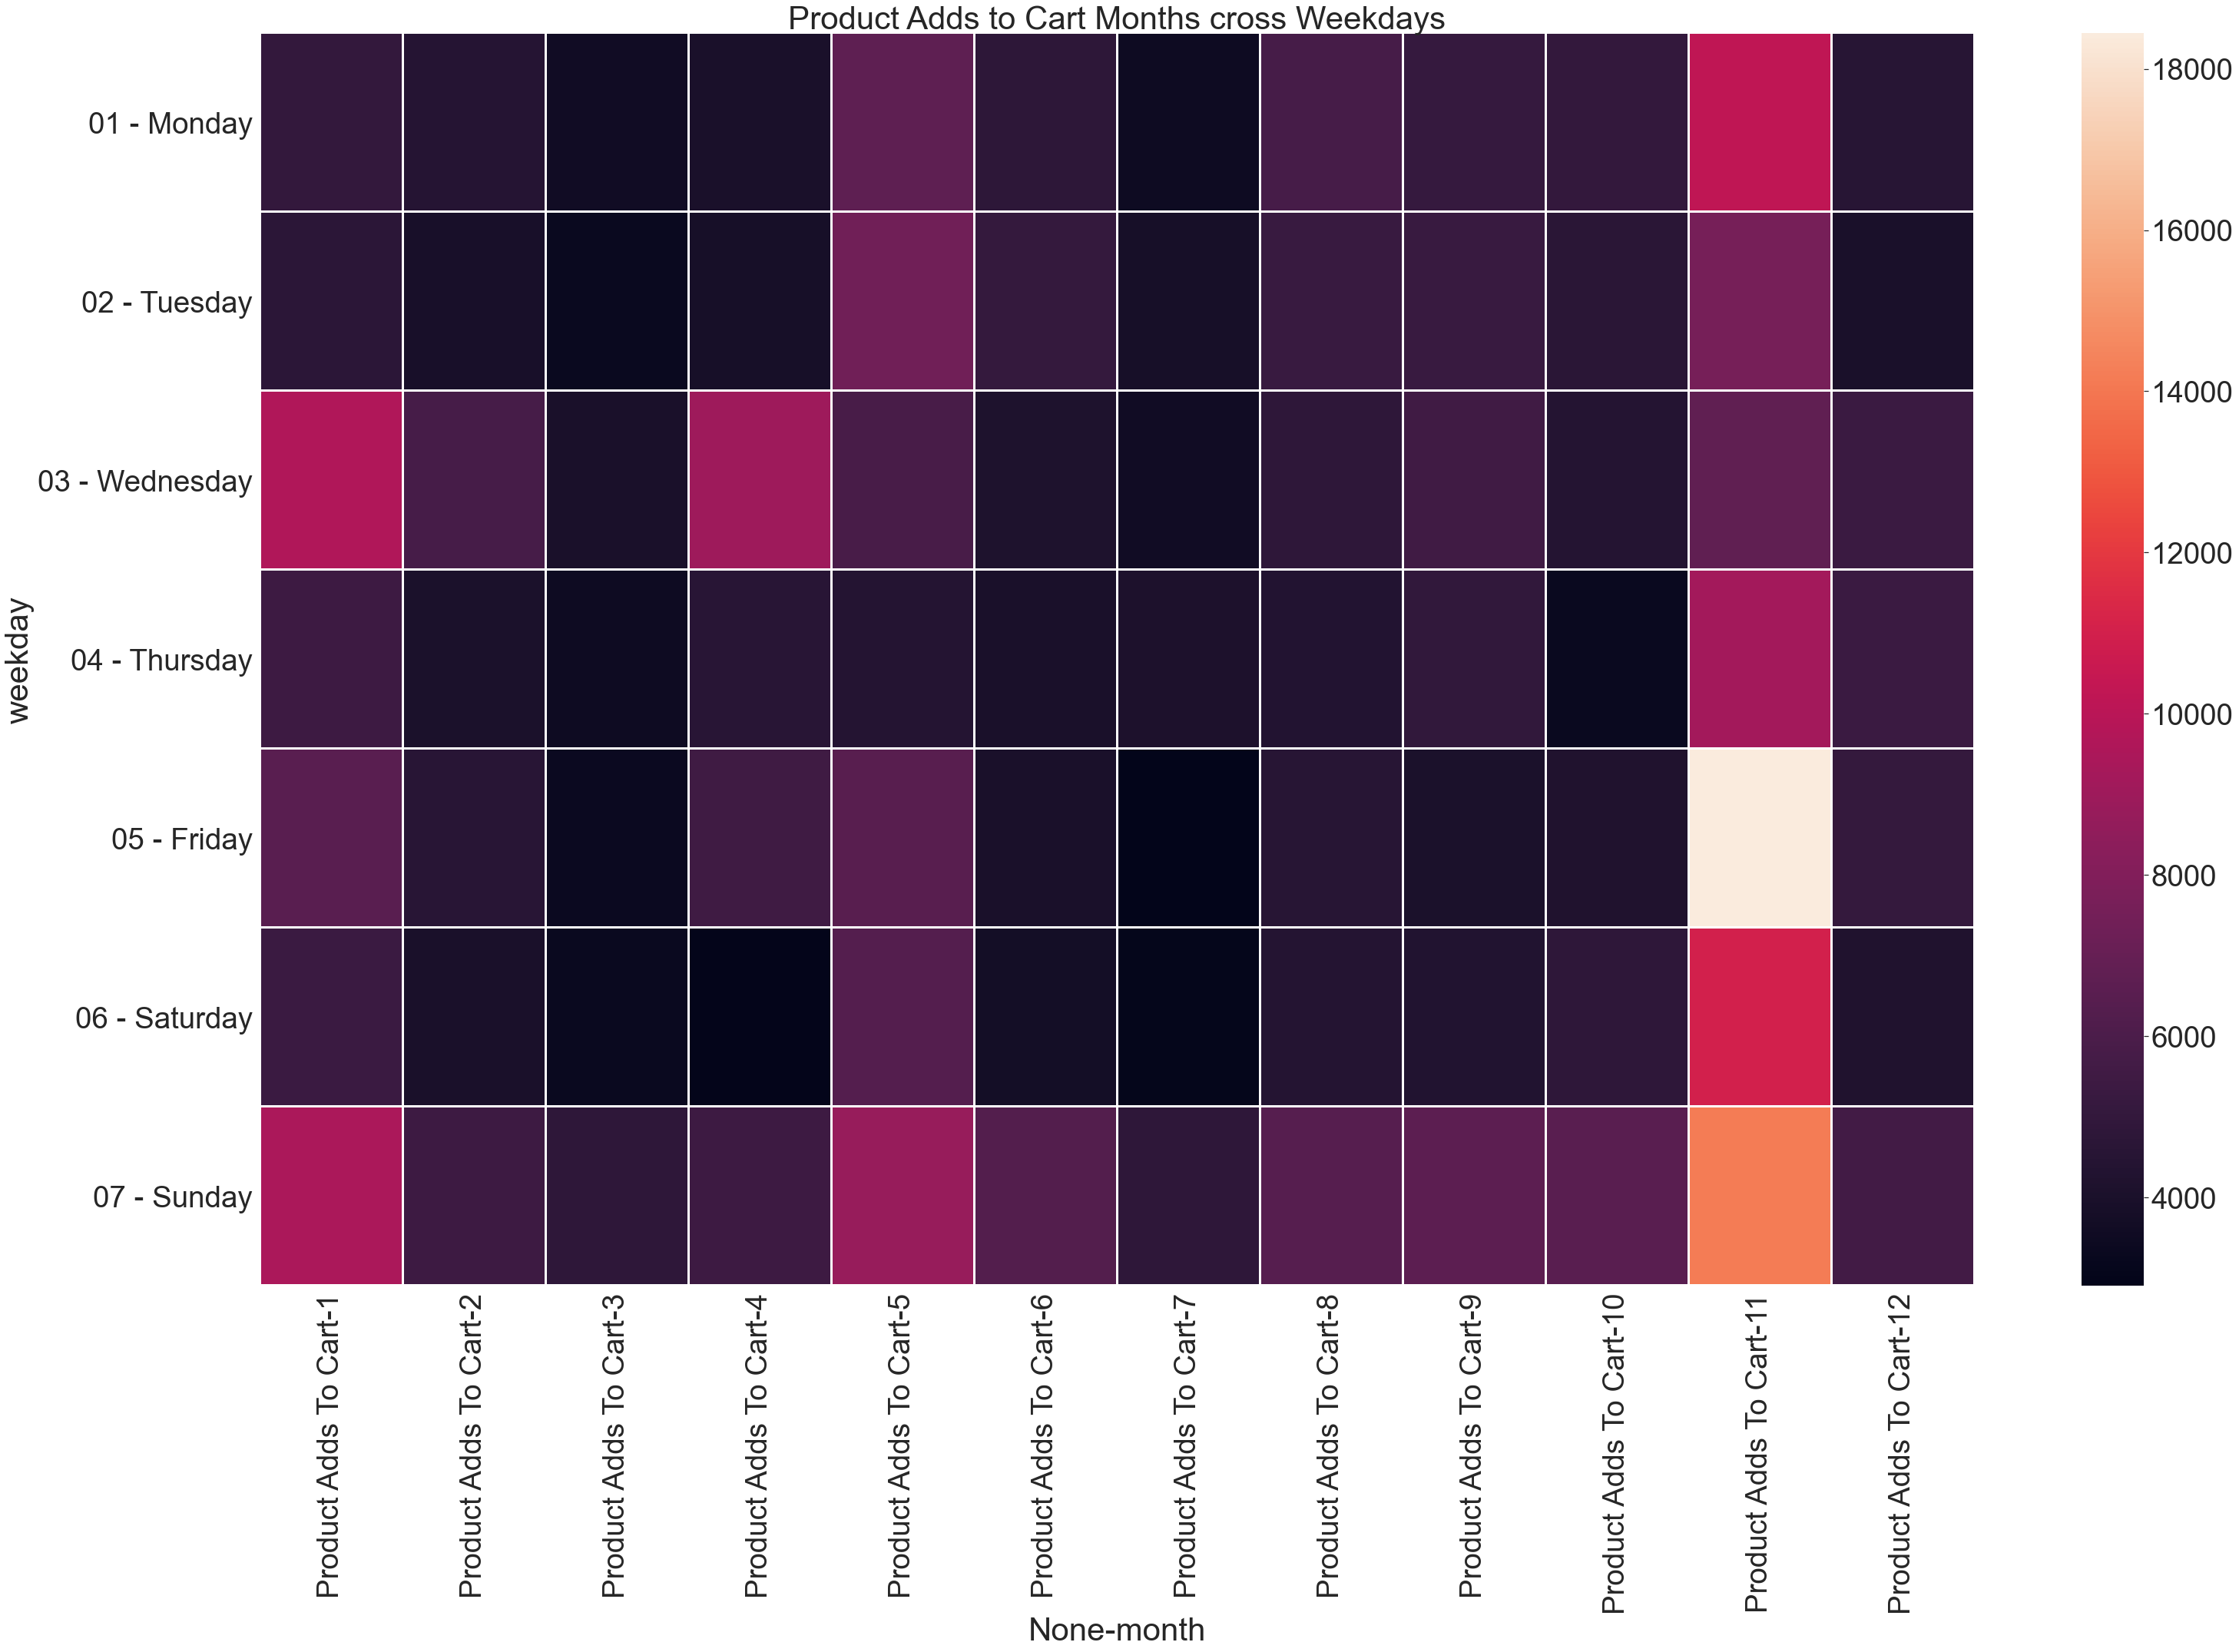

In [24]:
sns.set(font_scale=3.5) 

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_PAC_Group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Product Adds to Cart Months cross Weekdays')
plt.show()

In [25]:
GA_day_PAC = tableGA.groupby(["month", "day"])['Product Adds To Cart'].mean().reset_index()
GA_day_PAC = tableGA.pivot('day','month','Product Adds To Cart')
GA_day_PAC.sort_index(inplace=True)

In [26]:
GA_day_PAC = pd.pivot_table(tableGA, values=['Product Adds To Cart'],index=['day'],
                                 columns=['month'],
                                aggfunc={'Product Adds To Cart': np.mean})

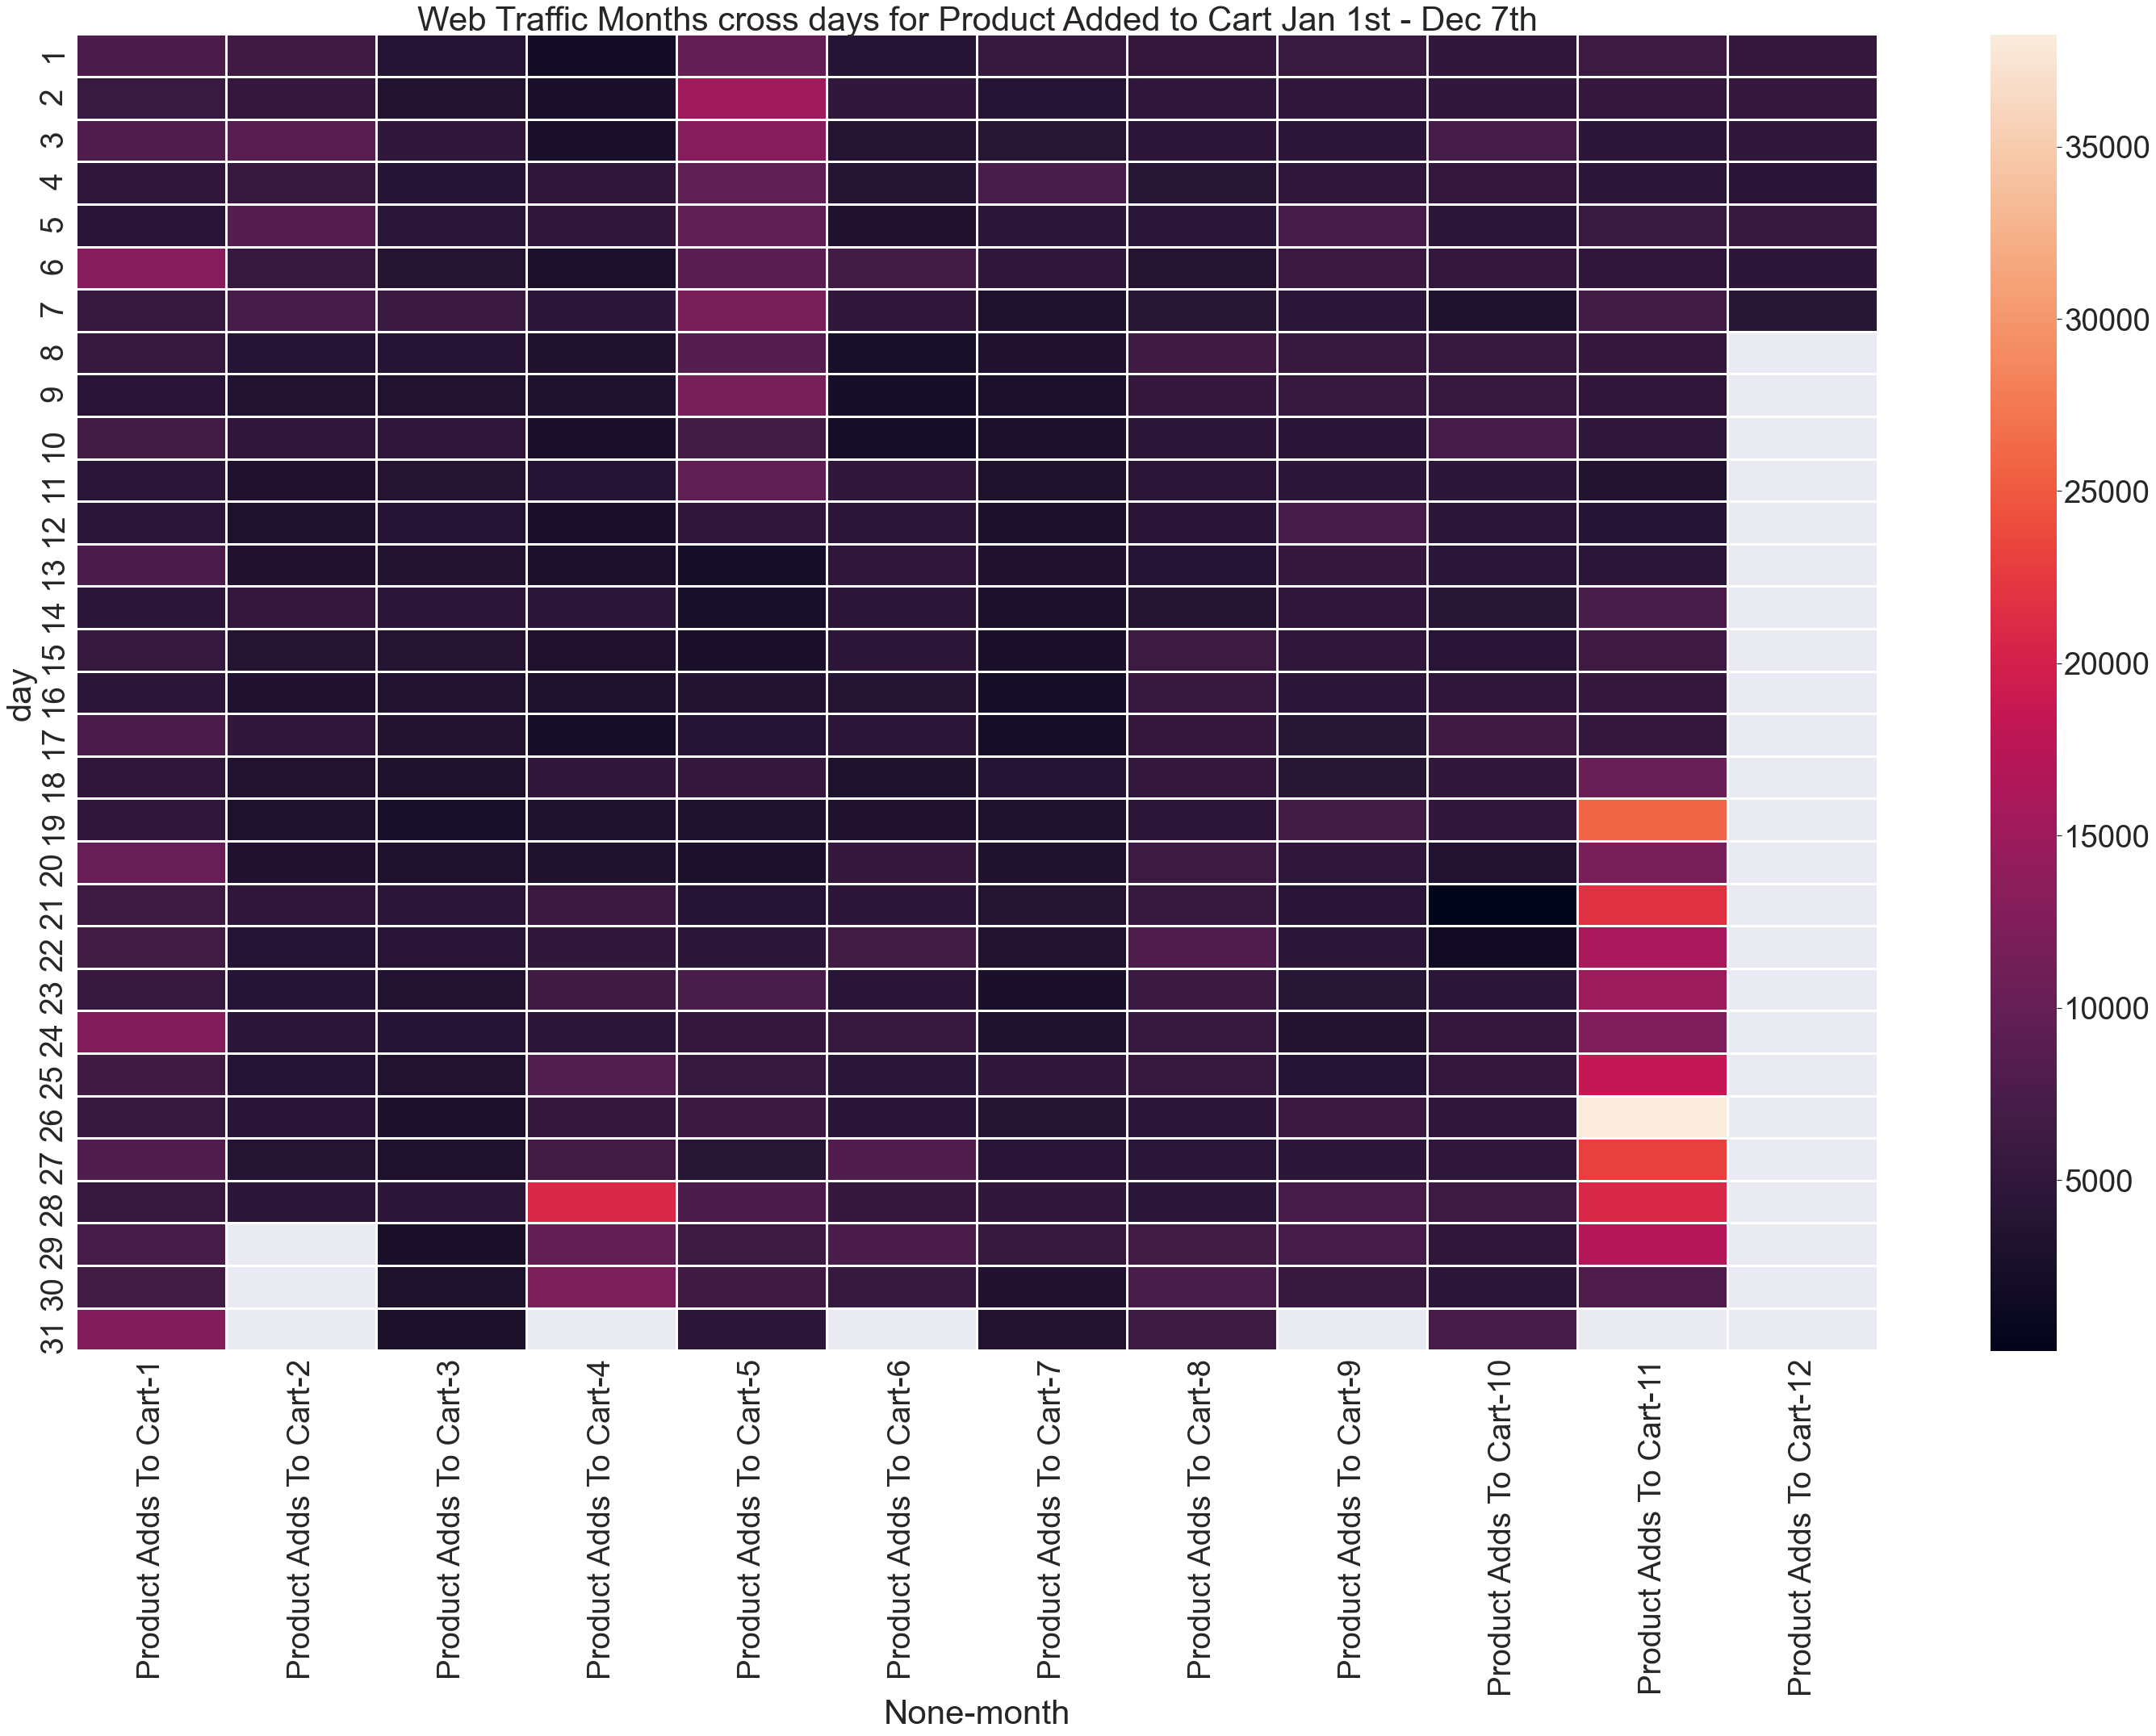

In [27]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(50, 30))
sns.heatmap(GA_day_PAC, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic Months cross days for Product Added to Cart Jan 1st - Dec 7th')
plt.show()

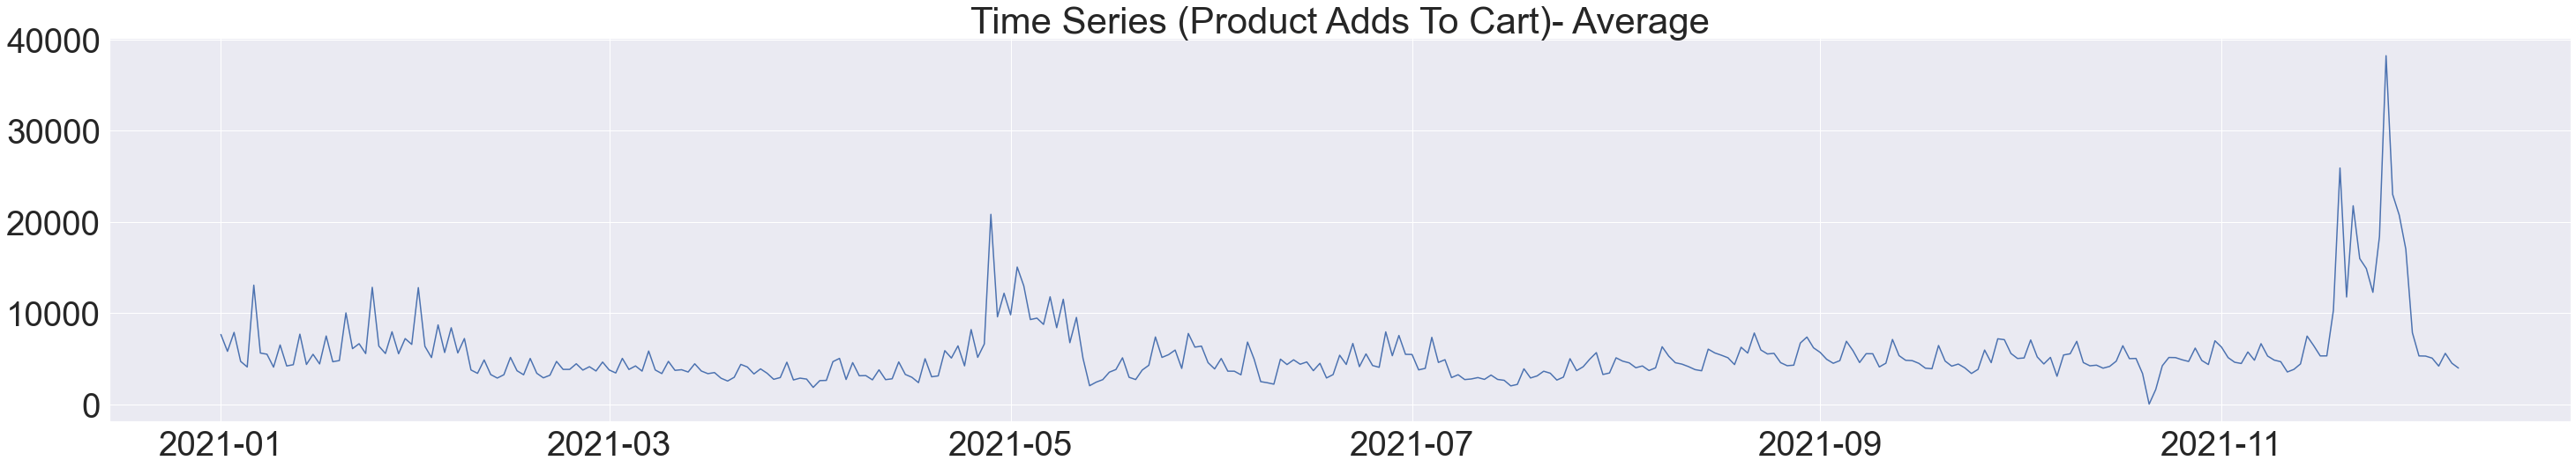

In [28]:
plt.figure(figsize=(50, 8))
mean_group_PAC = tableGA[['Date','Product Adds To Cart']].groupby(['Date'])['Product Adds To Cart'].mean()
plt.plot(mean_group_PAC)
plt.title('Time Series (Product Adds To Cart)- Average')
plt.show()

# Arima Models

In [29]:
PAC_timeseries_year_means =  pd.DataFrame(mean_group_PAC).reset_index(drop=False)
PAC_timeseries_year_means['weekday'] = PAC_timeseries_year_means['Date'].apply(lambda x: x.weekday())
PAC_timeseries_year_means['Date_str'] = PAC_timeseries_year_means['Date'].apply(lambda x: str(x))
PAC_timeseries_year_means[['year','month','day']] = pd.DataFrame(PAC_timeseries_year_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(PAC_timeseries_year_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
PAC_timeseries_year_means['day'] = date_staging['day']*1
PAC_timeseries_year_means.head()
PAC_timeseries_year_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  341 non-null    datetime64[ns]
 1   Product Adds To Cart  341 non-null    int32         
 2   weekday               341 non-null    int64         
 3   Date_str              341 non-null    object        
 4   year                  341 non-null    object        
 5   month                 341 non-null    object        
 6   day                   341 non-null    object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 17.4+ KB


In [30]:
# evaluate Rolling mean, Rolling Standard deviation and Test for the stationnarity
df_date_index_PAC = PAC_timeseries_year_means[['Date','Product Adds To Cart']].set_index('Date')

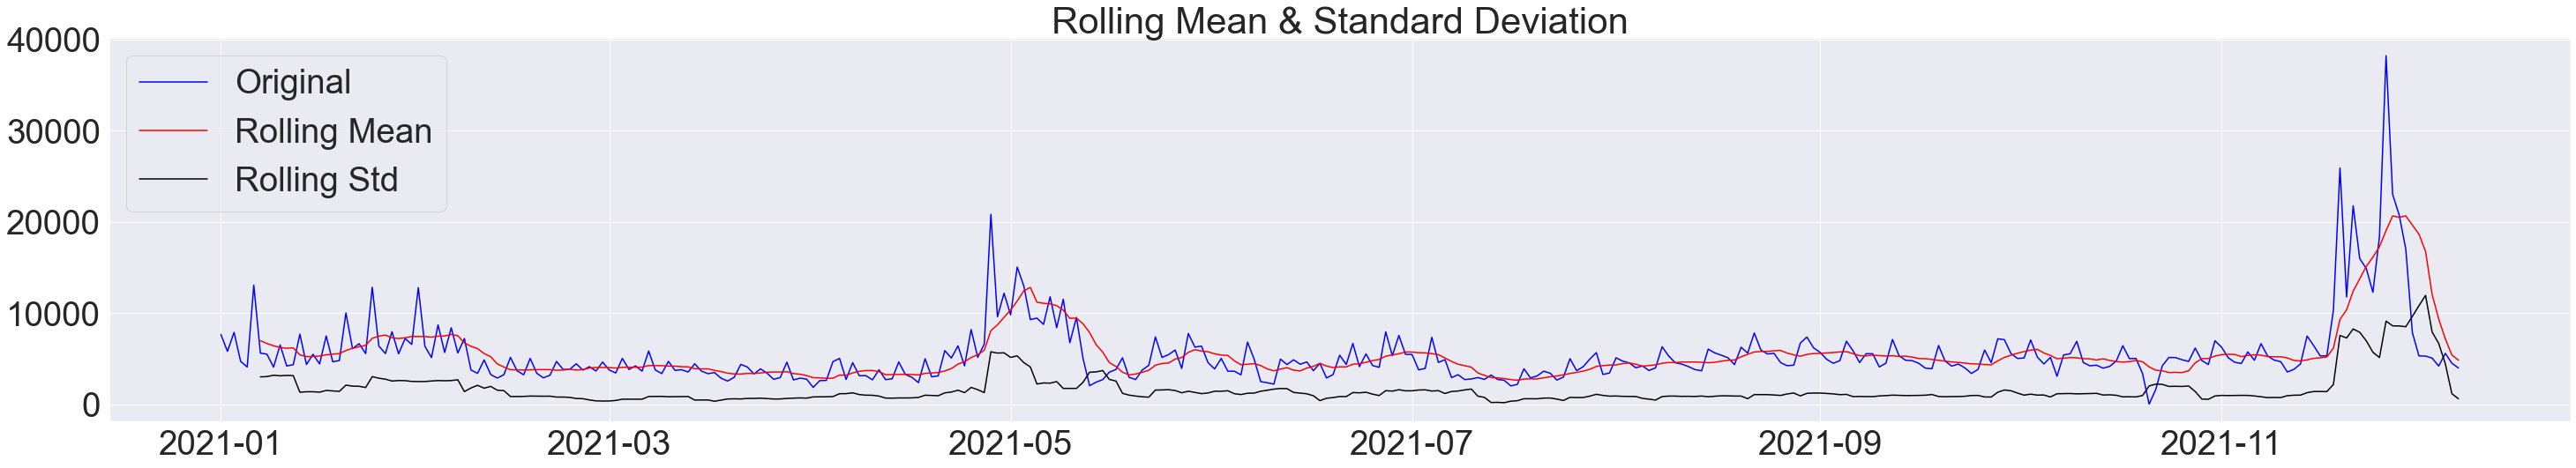

Results of Dickey-Fuller Test:
Test Statistic                  -2.008394
p-value                          0.282905
#Lags Used                      17.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64


In [31]:
def test_stationarity(timeseries):
    plt.figure(figsize=(50, 8))
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries['Product Adds To Cart'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(df_date_index_PAC)   

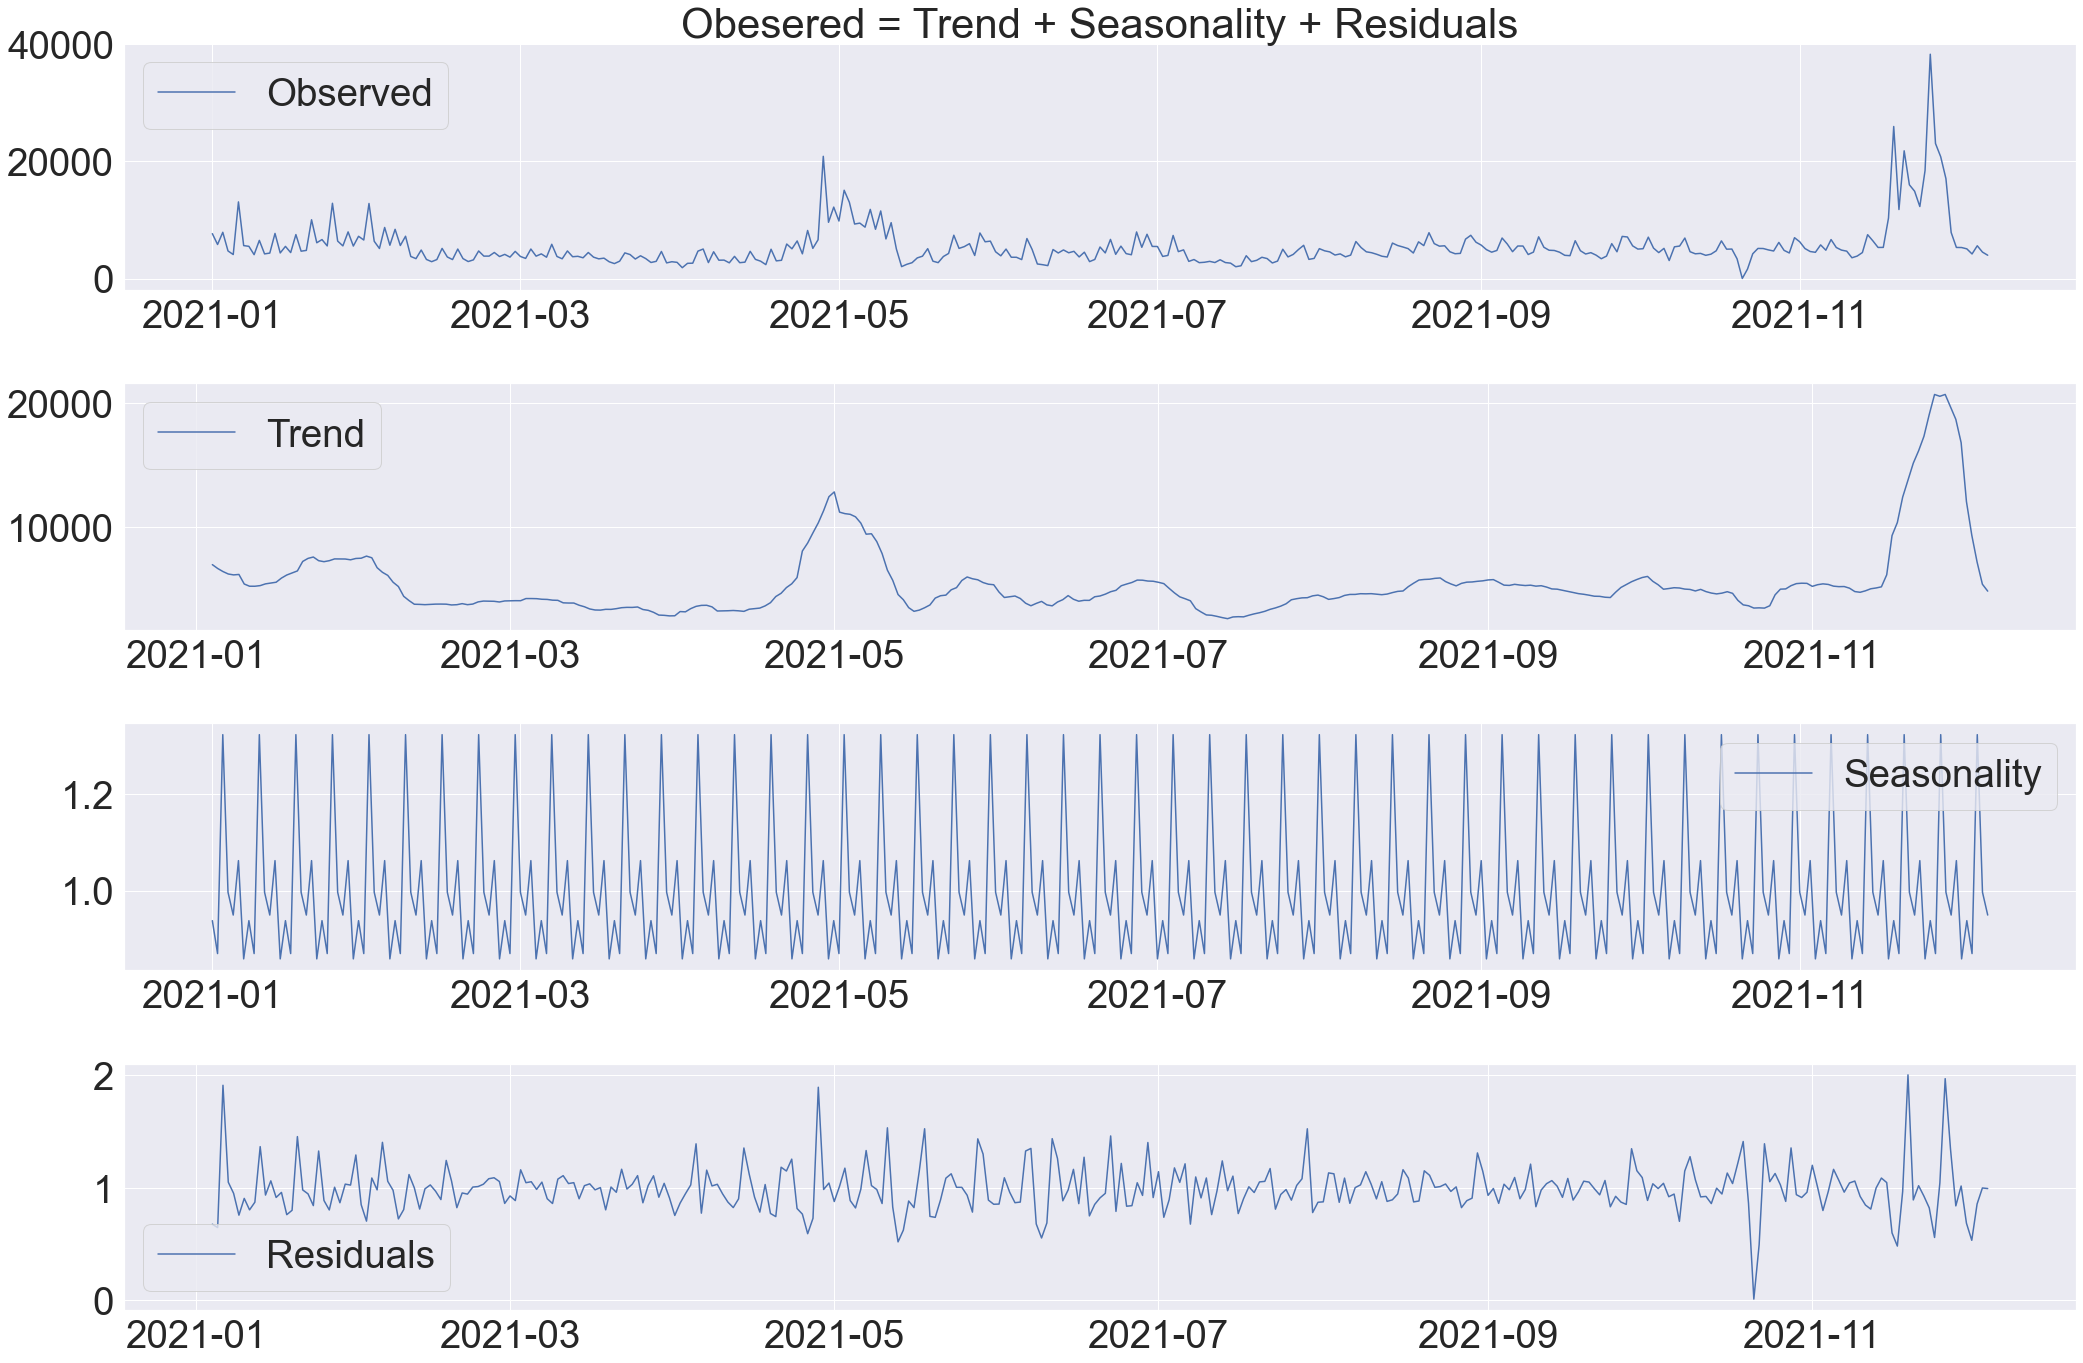

In [32]:
# Naive decomposition of our Time Series as explained above
decomposition = sm.tsa.seasonal_decompose(df_date_index_PAC, model='multiplicative',freq = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.rcParams['figure.figsize'] = 30, 20

plt.subplot(411)
plt.title('Obesered = Trend + Seasonality + Residuals')
plt.plot(df_date_index_PAC, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

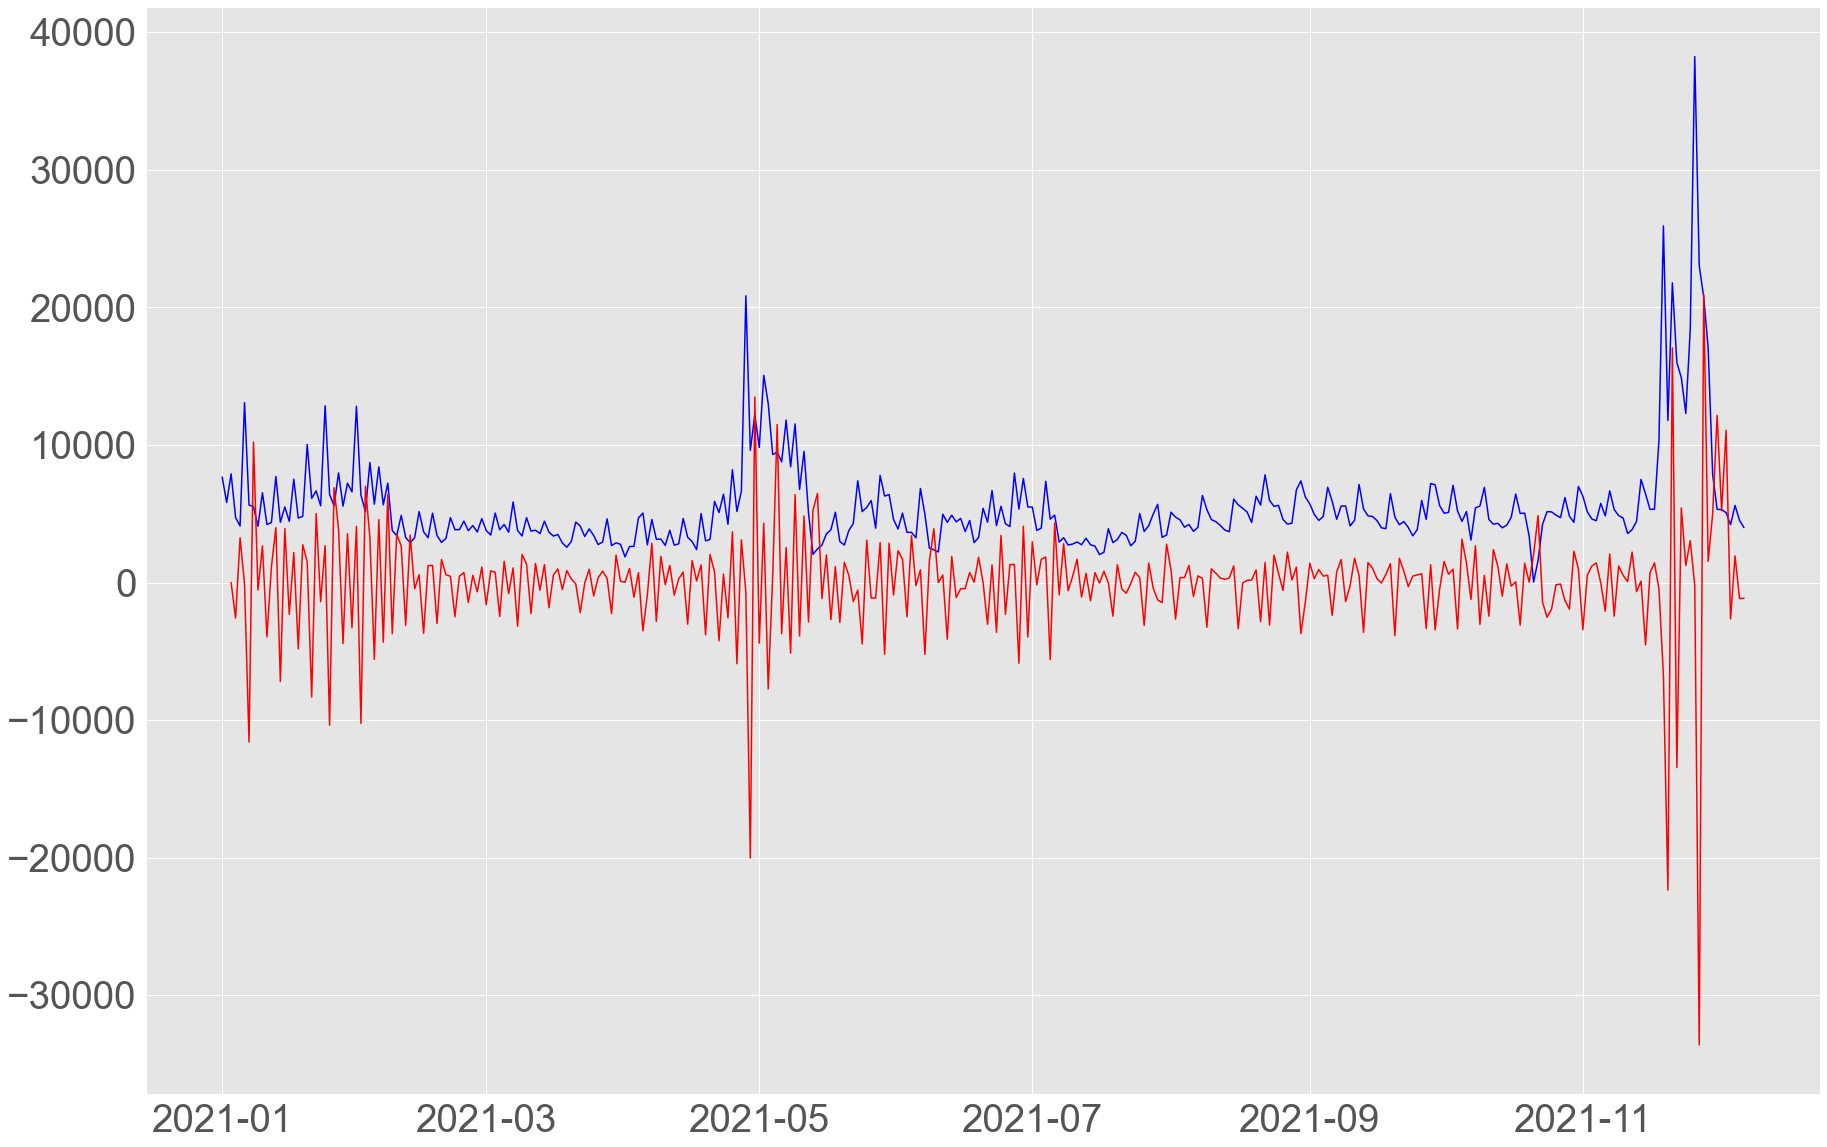

In [45]:
from statsmodels.tsa.arima_model import ARIMA

modelARIMA_PAC = ARIMA(df_date_index_PAC, order=(7, 2, 1))  
results_AR_PAC = modelARIMA_PAC.fit(disp=-1)  
plt.plot(df_date_index_PAC, color = 'blue')
plt.plot(results_AR_PAC.fittedvalues, color='red')
plt.show()

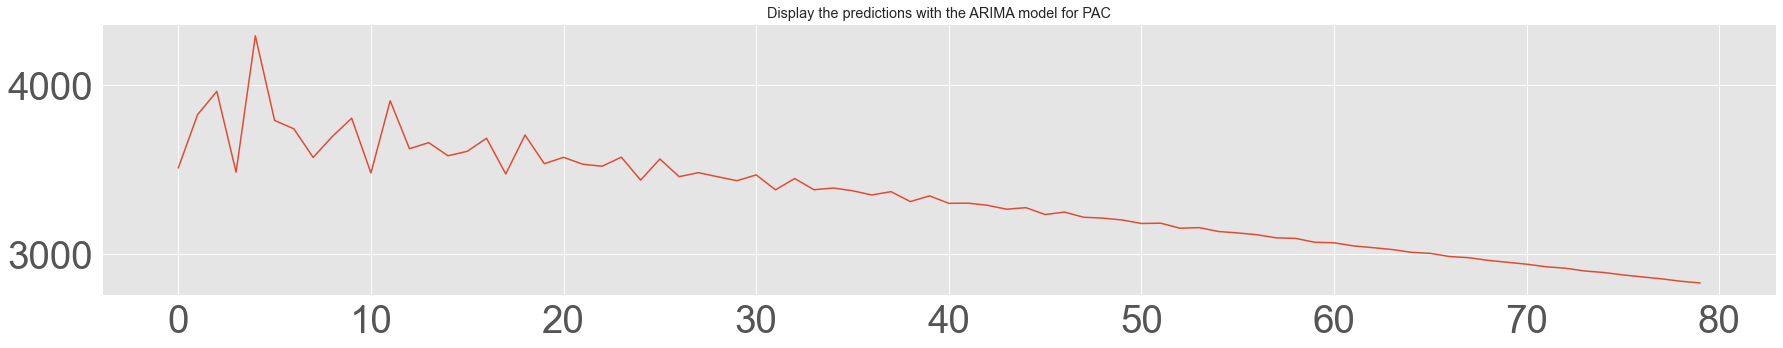

array([3509.13302981, 3823.94534377, 3961.6808573 , 3484.02648484,
       4289.44988064, 3789.79242242, 3740.35340683, 3571.50551031,
       3695.47292615, 3802.9209685 , 3479.36865652, 3906.0547109 ,
       3623.02389281, 3658.68604612, 3581.22677312, 3607.41505476,
       3684.63804535, 3473.86146949, 3703.68842164, 3534.39572566,
       3571.89887274, 3531.17391287, 3519.49558546, 3572.83095903,
       3437.39226376, 3562.1326174 , 3457.79923702, 3481.29181024,
       3457.34603929, 3433.88657117, 3468.11770263, 3380.16900943,
       3446.76632347, 3380.47495373, 3390.75734881, 3374.68246527,
       3349.63364879, 3369.29788941, 3310.65691726, 3344.25015143,
       3300.39643067, 3301.34934023, 3288.8036442 , 3265.59467879,
       3274.70743178, 3234.04397826, 3248.58871598, 3217.96143636,
       3213.03228596, 3201.86749232, 3181.22700782, 3182.99747496,
       3153.35158131, 3156.7899798 , 3133.92669952, 3125.52310693,
       3114.71534893, 3096.40588848, 3093.21626354, 3070.32445

In [46]:
forecast_PAC = results_AR_PAC.forecast(steps = 80)[0]
plt.figure(figsize=(30, 5))
plt.plot(pd.DataFrame(forecast_PAC))
plt.title('Display the predictions with the ARIMA model for PAC')
plt.show()
forecast_PAC

In [47]:
PAC_timeseries_year_means

,Date,Product Adds To Cart,weekday,Date_str,year,month,day,diff
0,2021-01-01,7671,4,2021-01-01 00:00:00,2021,01,01,NaN
1,2021-01-02,5827,5,2021-01-02 00:00:00,2021,01,02,-1844.0
2,2021-01-03,7905,6,2021-01-03 00:00:00,2021,01,03,2078.0
3,2021-01-04,4725,0,2021-01-04 00:00:00,2021,01,04,-3180.0
4,2021-01-05,4114,1,2021-01-05 00:00:00,2021,01,05,-611.0
...,...,...,...,...,...,...,...,...
336,2021-12-03,5083,4,2021-12-03 00:00:00,2021,12,03,-224.0
337,2021-12-04,4211,5,2021-12-04 00:00:00,2021,12,04,-872.0
338,2021-12-05,5607,6,2021-12-05 00:00:00,2021,12,05,1396.0
339,2021-12-06,4525,0,2021-12-06 00:00:00,2021,12,06,-1082.0


In [48]:
def lag_func(data,lag):
    lag = lag
    X = lagmat(data["diff"], lag)
    lagged = data.copy()
    for c in range(1,lag+1):
        lagged["lag%d" % c] = X[:, c-1]
    return lagged

In [49]:
def diff_creation(data):
    data["diff"] = np.nan
    data.loc[1:, "diff"] = (data.iloc[1:, 1].to_numpy() - data.iloc[:len(data)-1, 1].to_numpy())
    return data

In [50]:
df_count_PAC=diff_creation(PAC_timeseries_year_means)
# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count_PAC,lag)
last_date = lagged['Date'].max()


In [51]:
df_count_PAC['Date'].max()

Timestamp('2021-12-07 00:00:00')

In [52]:
#DataFrame to collect the predictions
df_prediction_arima_PAC = df_date_index_PAC.copy()

list_date = []
for i in range(81):
    if i >0:
        list_date.append(last_date  + pd.to_timedelta(i, unit='D'))
    
predictions_arima_PAC= pd.DataFrame(list_date,columns = ['Date'])
predictions_arima_PAC['Product Adds To Cart'] = 0
predictions_arima_PAC.set_index('Date',inplace=True)
predictions_arima_PAC['Product Adds To Cart'] = (forecast_PAC)

df_prediction_arima_PAC = df_prediction_arima_PAC.append(predictions_arima_PAC)
df_prediction_arima_PAC.reset_index(drop=False,inplace=True)

In [53]:
df_prediction_arima_PAC

,Date,Product Adds To Cart
0,2021-01-01,7671.000000
1,2021-01-02,5827.000000
2,2021-01-03,7905.000000
3,2021-01-04,4725.000000
4,2021-01-05,4114.000000
...,...,...
416,2022-02-21,2877.560087
417,2022-02-22,2865.619863
418,2022-02-23,2854.222437
419,2022-02-24,2840.051831


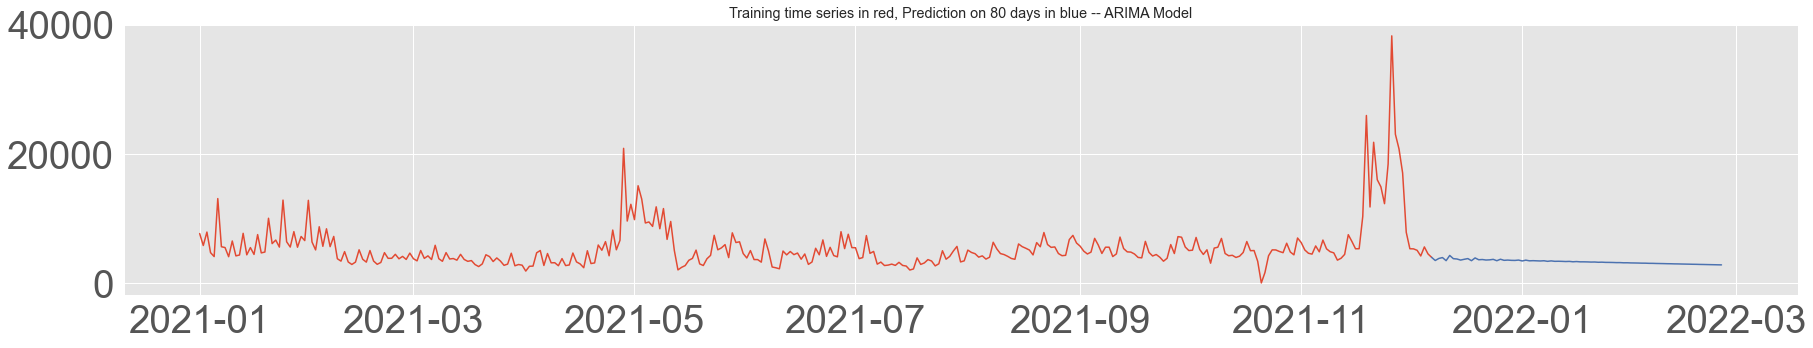

In [55]:
df_arima_PAC = df_prediction_arima_PAC[['Product Adds To Cart','Date']]
df_train_PAC = df_arima_PAC[df_arima_PAC['Date'] <= last_date]
df_pred_PAC = df_arima_PAC[df_prediction_arima_PAC['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_PAC.Date,df_train_PAC['Product Adds To Cart'])
plt.plot(df_pred_PAC.Date,df_pred_PAC['Product Adds To Cart'],color='b')
plt.title('Training time series in red, Prediction on 80 days in blue -- ARIMA Model')
plt.show()

In [57]:
df_pred_PAC.to_csv('ARIMA_PRED_PAC_SEPNOTEBOOK_80PRED.csv',index=False)

# Machine learning Approach

In [95]:
PAC_timeseries_means =  pd.DataFrame(mean_group_PAC).reset_index(drop=False)
PAC_timeseries_means['weekday'] = PAC_timeseries_means['Date'].apply(lambda x: x.weekday())
PAC_timeseries_means['Date_str'] = PAC_timeseries_means['Date'].apply(lambda x: str(x))
PAC_timeseries_means[['year','month','day']] = pd.DataFrame(PAC_timeseries_means['Date_str'].str.split('-',2).tolist(), columns = ['year','month','day'])
date_staging = pd.DataFrame(PAC_timeseries_means['day'].str.split(' ',2).tolist(), columns = ['day','other'])
PAC_timeseries_means['day'] = date_staging['day']*1
PAC_timeseries_means.head()

,Date,Product Adds To Cart,weekday,Date_str,year,month,day
0,2021-01-01,7671,4,2021-01-01 00:00:00,2021,01,01
1,2021-01-02,5827,5,2021-01-02 00:00:00,2021,01,02
2,2021-01-03,7905,6,2021-01-03 00:00:00,2021,01,03
3,2021-01-04,4725,0,2021-01-04 00:00:00,2021,01,04
4,2021-01-05,4114,1,2021-01-05 00:00:00,2021,01,05


In [96]:
df_count_PAC=diff_creation(PAC_timeseries_means)

In [97]:
# Creation of 7 features with "diff"
lag = 7
lagged = lag_func(df_count_PAC,lag)
last_date = lagged['Date'].max()

In [98]:
lagged

,Date,Product Adds To Cart,weekday,Date_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2021-01-01,7671,4,2021-01-01 00:00:00,2021,01,01,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-02,5827,5,2021-01-02 00:00:00,2021,01,02,-1844.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-01-03,7905,6,2021-01-03 00:00:00,2021,01,03,2078.0,-1844.0,NaN,0.0,0.0,0.0,0.0,0.0
3,2021-01-04,4725,0,2021-01-04 00:00:00,2021,01,04,-3180.0,2078.0,-1844.0,NaN,0.0,0.0,0.0,0.0
4,2021-01-05,4114,1,2021-01-05 00:00:00,2021,01,05,-611.0,-3180.0,2078.0,-1844.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2021-12-03,5083,4,2021-12-03 00:00:00,2021,12,03,-224.0,-17.0,-2544.0,-9170.0,-3728.0,-2270.0,-15209.0,19812.0
337,2021-12-04,4211,5,2021-12-04 00:00:00,2021,12,04,-872.0,-224.0,-17.0,-2544.0,-9170.0,-3728.0,-2270.0,-15209.0
338,2021-12-05,5607,6,2021-12-05 00:00:00,2021,12,05,1396.0,-872.0,-224.0,-17.0,-2544.0,-9170.0,-3728.0,-2270.0
339,2021-12-06,4525,0,2021-12-06 00:00:00,2021,12,06,-1082.0,1396.0,-872.0,-224.0,-17.0,-2544.0,-9170.0,-3728.0


In [99]:
# Train Test split
def train_test(data_lag):
    xc = ["lag%d" % i for i in range(1,lag+1)] + ['weekday'] + ['day']
    split = 0.70
    xt = data_lag[(lag+1):][xc]
    yt = data_lag[(lag+1):]["diff"]
    isplit = int(len(xt) * split)
    x_train, y_train, x_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]
    return x_train, y_train, x_test, y_test, xt, yt

In [100]:
x_train, y_train, x_test, y_test, xt, yt = train_test(lagged)

In [101]:
# Linear Model
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def modelisation(x_tr, y_tr, x_ts, y_ts, xt, yt, model0, model1):
    # Modelisation with all product
    model0.fit(x_tr, y_tr)

    prediction = model0.predict(x_ts)
    r2 = r2_score(y_ts.to_numpy(), model0.predict(x_ts))
    mae = mean_absolute_error(y_ts.to_numpy(), model0.predict(x_ts))
    print ("-----------------------------------------------")
    print ("mae with 70% of the data to train:", mae)
    print ("-----------------------------------------------")

    # Model with all data
    model1.fit(xt, yt) 
    
    return model1, prediction, model0

model0 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)
model1 =  AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

clr, prediction, clr0  = modelisation(x_train, y_train, x_test, y_test, xt, yt, model0, model1)

-----------------------------------------------
mae with 70% of the data to train: 1755.422168348521
-----------------------------------------------


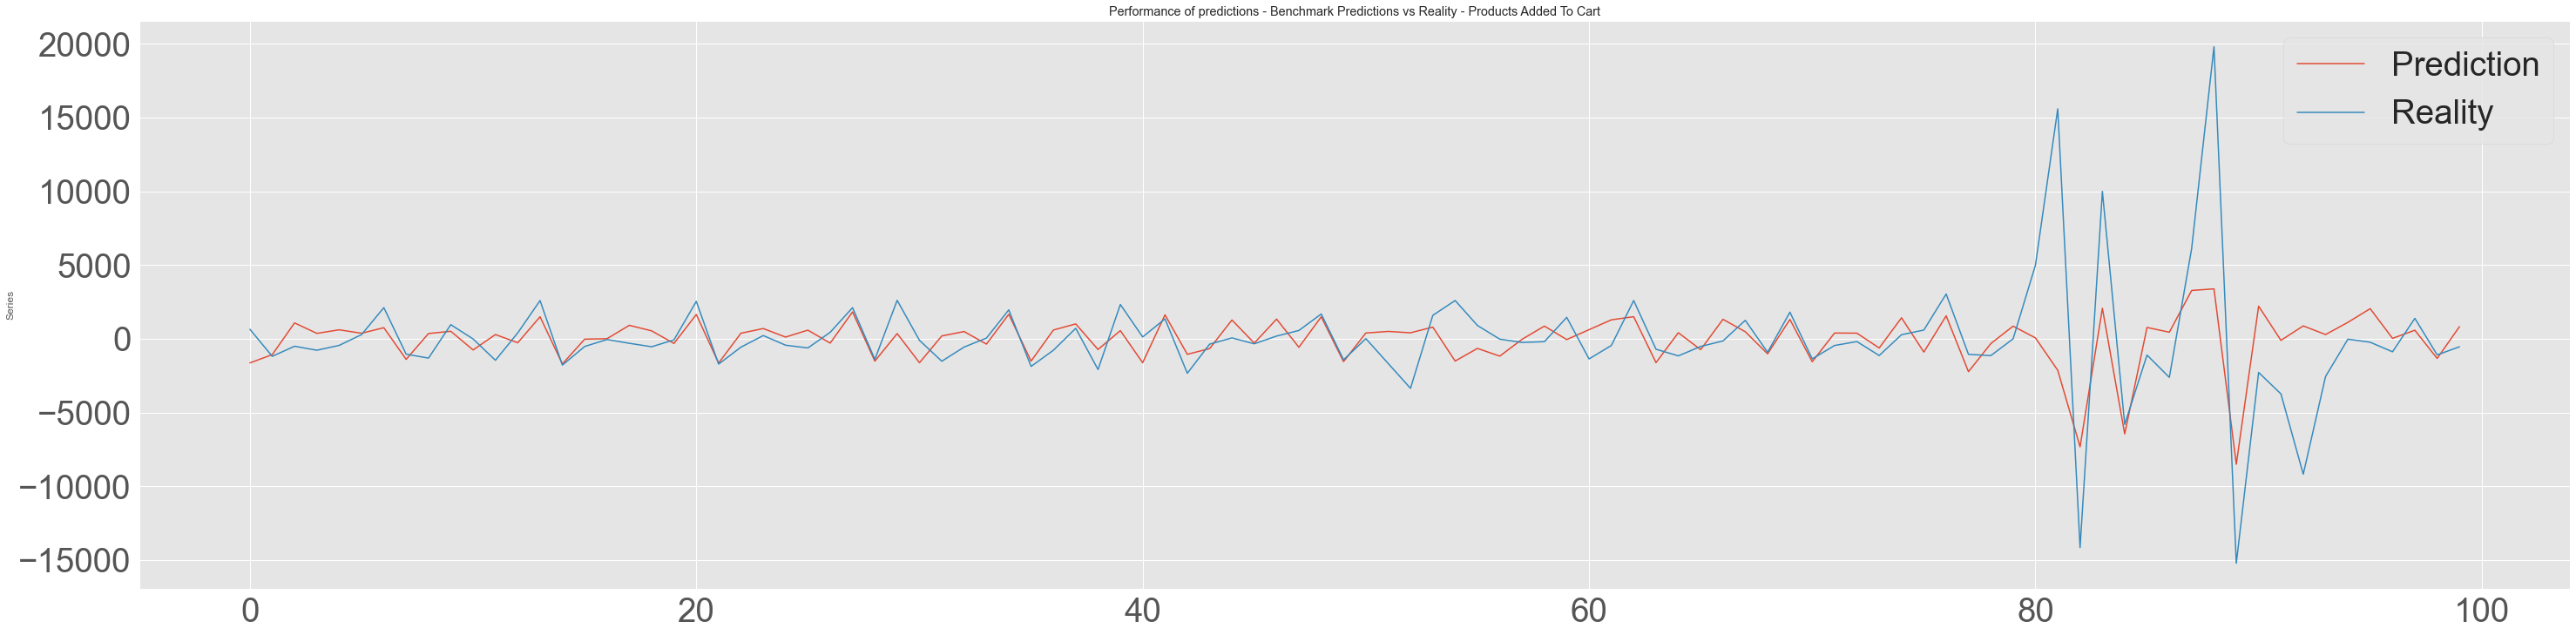

In [102]:
# Performance 1
plt.style.use('ggplot')
plt.figure(figsize=(50, 12))
line_up, = plt.plot(prediction,label='Prediction')
line_down, = plt.plot(np.array(y_test),label='Reality')
plt.ylabel('Series')
plt.legend(handles=[line_up, line_down])
plt.title('Performance of predictions - Benchmark Predictions vs Reality - Products Added To Cart')
plt.show()

In [118]:
# Prediction
def pred_df(data,number_of_days):
    data_pred = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=1)),columns = ["Date"])
    for i in range(number_of_days):
        inter = pd.DataFrame(pd.Series(data["Date"][data.shape[0]-1] + timedelta(days=i+2)),columns = ["Date"])
        data_pred = pd.concat([data_pred,inter]).reset_index(drop=True)
    return data_pred

data_to_pred = pred_df(df_count_PAC,80)

In [119]:
data_to_pred

,Date
0,2021-12-08
1,2021-12-09
2,2021-12-10
3,2021-12-11
4,2021-12-12
...,...
76,2022-02-22
77,2022-02-23
78,2022-02-24
79,2022-02-25


In [120]:
def initialisation(data_lag, data_pred, model, xtrain, ytrain, number_of_days):
    # Initialisation
    model.fit(xtrain, ytrain)
    
    for i in range(number_of_days-1):
        lag1 = data_lag.tail(1)["diff"].values[0]
        lag2 = data_lag.tail(1)["lag1"].values[0]
        lag3 = data_lag.tail(1)["lag2"].values[0]
        lag4 = data_lag.tail(1)["lag3"].values[0]
        lag5 = data_lag.tail(1)["lag4"].values[0]
        lag6 = data_lag.tail(1)["lag5"].values[0]
        lag7 = data_lag.tail(1)["lag6"].values[0]
        lag8 = data_lag.tail(1)["lag7"].values[0]
        
        data_pred['weekday'] = data_pred['Date'].apply(lambda x:x.weekday())
        weekday = data_pred['weekday'][0]
        
        row = pd.Series([lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,weekday]
                        ,['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        to_predict = pd.DataFrame(columns = ['lag1', 'lag2', 'lag3','lag4','lag5','lag6','lag7','lag8','weekday'])
        prediction = pd.DataFrame(columns = ['diff'])
        to_predict = to_predict.append([row])
        prediction = pd.DataFrame(model.predict(to_predict),columns = ['diff'])

        # Loop
        if i == 0:
            last_predict = data_lag["Product Adds To Cart"][data_lag.shape[0]-1] + prediction.values[0][0]

        if i > 0 :
            last_predict = data_lag["Product Adds To Cart"][data_lag.shape[0]-1] + prediction.values[0][0]
            
            data_lag = pd.concat([data_lag,prediction.join(data_pred["Date"]).join(to_predict)]).reset_index(drop=True)
        data_lag["Product Adds To Cart"][data_lag.shape[0]-1] = last_predict
        
        # test
        data_pred = data_pred[data_pred["Date"]>data_pred["Date"][0]].reset_index(drop=True)
        
    return data_lag

model_fin = AdaBoostRegressor(n_estimators = 5000, random_state = 42, learning_rate=0.01)

In [124]:
lagged_PAC

,Date,Product Adds To Cart,weekday,Date_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2021-01-01,7671.0,4.0,2021-01-01 00:00:00,2021,01,01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2021-01-02,5827.0,5.0,2021-01-02 00:00:00,2021,01,02,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2021-01-03,7905.0,6.0,2021-01-03 00:00:00,2021,01,03,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2021-01-04,4725.0,0.0,2021-01-04 00:00:00,2021,01,04,-3180.000000,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2021-01-05,4114.0,1.0,2021-01-05 00:00:00,2021,01,05,-611.000000,-3180.000000,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-02-20,0.0,6.0,NaN,NaN,NaN,NaN,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185,-204.400000,-206.251462
415,2022-02-21,0.0,0.0,NaN,NaN,NaN,NaN,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185,-204.400000
416,2022-02-22,0.0,1.0,NaN,NaN,NaN,NaN,-146.585185,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185
417,2022-02-23,0.0,2.0,NaN,NaN,NaN,NaN,-27.882353,-146.585185,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353


In [122]:
lagged_PAC = initialisation(lagged, data_to_pred, model_fin, xt, yt, 80)

In [123]:
lagged_PAC[lagged_PAC['diff']<0]
lagged_PAC.loc[(lagged_PAC['Product Adds To Cart'] < 0), 'Product Adds To Cart'] = 0



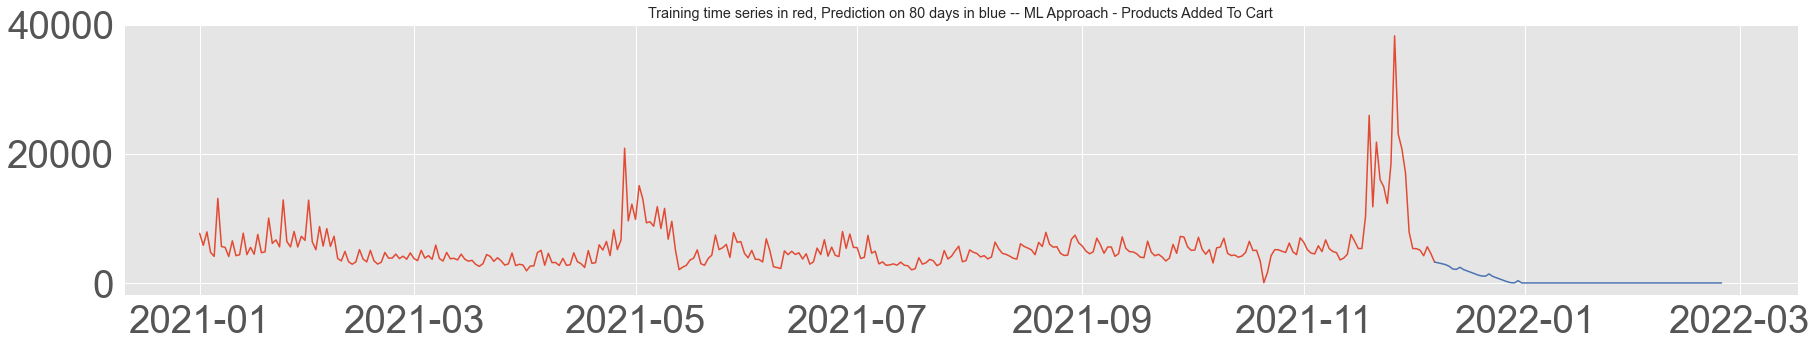

In [125]:
df_lagged_PAC = lagged_PAC[['Product Adds To Cart','Date']]
df_train_PAC = df_lagged_PAC[df_lagged_PAC['Date'] <= last_date]
df_pred_PAC = df_lagged_PAC[df_lagged_PAC['Date'] >= last_date]
plt.style.use('ggplot')
plt.figure(figsize=(30, 5))
plt.plot(df_train_PAC.Date,df_train_PAC['Product Adds To Cart'])
plt.plot(df_pred_PAC.Date,df_pred_PAC['Product Adds To Cart'],color='b')
plt.title('Training time series in red, Prediction on 80 days in blue -- ML Approach - Products Added To Cart')
plt.show()

In [126]:
df_pred_PAC

,Product Adds To Cart,Date
340,3235.000000,2021-12-07
341,2982.064516,2021-12-09
342,2840.799456,2021-12-10
343,2591.147843,2021-12-11
344,2167.961969,2021-12-12
...,...,...
414,0.000000,2022-02-20
415,0.000000,2022-02-21
416,0.000000,2022-02-22
417,0.000000,2022-02-23


In [127]:
df_pred_PAC.to_csv('MLMODEL_PRED_PAC_SEPNOTEBOOK_80PRED.csv',index=False)

# Basic Model

In [128]:
lagged_PAC

,Date,Product Adds To Cart,weekday,Date_str,year,month,day,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
0,2021-01-01,7671.0,4.0,2021-01-01 00:00:00,2021,01,01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2021-01-02,5827.0,5.0,2021-01-02 00:00:00,2021,01,02,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2021-01-03,7905.0,6.0,2021-01-03 00:00:00,2021,01,03,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2021-01-04,4725.0,0.0,2021-01-04 00:00:00,2021,01,04,-3180.000000,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
4,2021-01-05,4114.0,1.0,2021-01-05 00:00:00,2021,01,05,-611.000000,-3180.000000,2078.000000,-1844.000000,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2022-02-20,0.0,6.0,NaN,NaN,NaN,NaN,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185,-204.400000,-206.251462
415,2022-02-21,0.0,0.0,NaN,NaN,NaN,NaN,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185,-204.400000
416,2022-02-22,0.0,1.0,NaN,NaN,NaN,NaN,-146.585185,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353,-146.585185
417,2022-02-23,0.0,2.0,NaN,NaN,NaN,NaN,-27.882353,-146.585185,-206.251462,-206.251462,-210.455253,-208.706522,-368.088608,338.987654,-27.882353


In [129]:
lagged_basic_PAC = lagged_PAC[['Date','Product Adds To Cart','weekday']]
lagged_basic_tr_PAC   = lagged_basic_PAC[lagged_basic_PAC['Date'] < last_date_PAC]
lagged_basic_pred_PAC = lagged_basic_PAC[lagged_basic_PAC['Date'] >= last_date_PAC]
lagged_basic_pred_PAC.drop('Product Adds To Cart',inplace=True,axis=1)

In [130]:
prediction_by_days_PAC = pd.DataFrame(lagged_basic_PAC.groupby(['weekday'])['Product Adds To Cart'].mean())
prediction_by_days_PAC.reset_index(drop=False,inplace=True)
prediction_by_days_PAC

,weekday,Product Adds To Cart
0,0.0,4446.939297
1,1.0,4118.343322
2,2.0,4687.669547
3,3.0,3872.042551
4,4.0,4786.309461
5,5.0,4019.207680
6,6.0,5933.320544


In [131]:
basic_pred_PAC = pd.merge(lagged_basic_pred_PAC,prediction_by_days_PAC,on='weekday')
basic_approach_PAC = pd.concat([lagged_basic_tr_PAC,basic_pred_PAC])

In [132]:
plot_basic_PAC = np.array(basic_approach_PAC[basic_approach_PAC['Date'] > last_date].sort_values(by='Date')['Product Adds To Cart'])

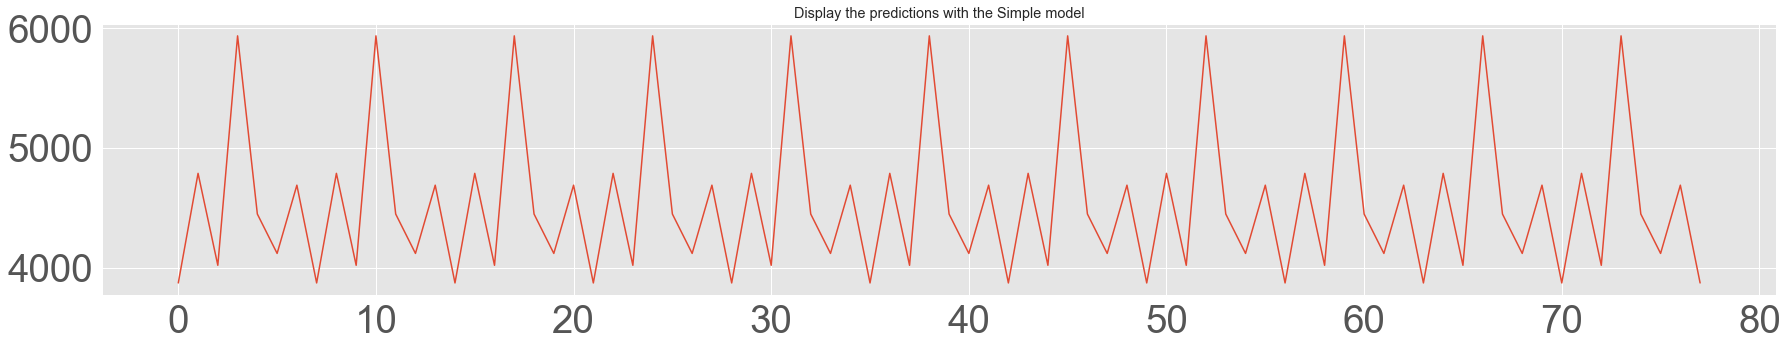

In [133]:
plt.figure(figsize=(30, 5))
plt.plot(plot_basic_PAC)
plt.title('Display the predictions with the Simple model')
plt.show()

In [134]:
basic_pred_PAC

,Date,weekday,Product Adds To Cart
0,2021-12-07,1.0,4118.343322
1,2021-12-14,1.0,4118.343322
2,2021-12-21,1.0,4118.343322
3,2021-12-28,1.0,4118.343322
4,2022-01-04,1.0,4118.343322
...,...,...,...
74,2022-01-26,2.0,4687.669547
75,2022-02-02,2.0,4687.669547
76,2022-02-09,2.0,4687.669547
77,2022-02-16,2.0,4687.669547


In [136]:
basic_pred_PAC.to_csv('BASIC-MODEL_PRED_PAC_SEPNOTEBOOK_80PRED.csv', index=False)